## The Provider Quality Dashboard
##### Added Excel Automation including Filtering, Styling, Security, Pre-filtering 
#### Joe Eberle - 4/2/2022


In [3]:
# Import Libraries for Spreadsheet Automation 
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import random
import math
import os
import glob
import matplotlib.pyplot as plt   # matplot is for python graphics

In [5]:
# Read in the CSV SQL output for NCQA HEDIS Quality Measures 
Path_to_Raw_Data = 'c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/'
Raw_Data_File_Name_1 = 'GPPC_PCP_Lancaster_Transit_org_prv_quality.xlsx'
Organizational_Quality = pd.read_excel(Path_to_Raw_Data + Raw_Data_File_Name_1)

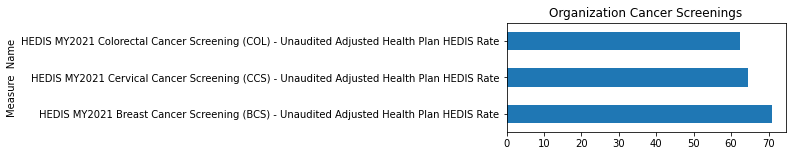

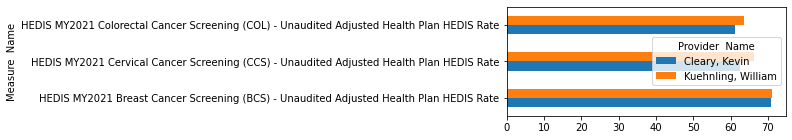

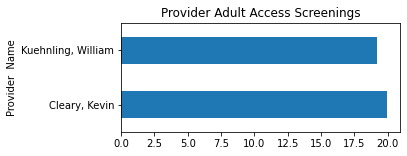

In [6]:
filter_criteria = (Organizational_Quality['Measure  Name'].str.contains('Cancer') & ~ Organizational_Quality['Measure  Name'].str.contains('Non-Rec')) 
df_cancer = Organizational_Quality[filter_criteria]
df_cancer.groupby(['Measure  Name'])['Measure  Completion  Percentage'].mean().plot(kind='barh', figsize=(5, 2), title= 'Organization Cancer Screenings')
plt.show()
df_cancer.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(5, 2))                                                                                                             
plt.show()
filter_criteria = (Organizational_Quality['Measure  Name'].str.contains('Adults')) 
df_adult = Organizational_Quality[filter_criteria]
df_adult.groupby(['Provider  Name'])['Measure  Completion  Percentage'].mean().plot(kind='barh', figsize=(5, 2), title= 'Provider Adult Access Screenings')
plt.show()

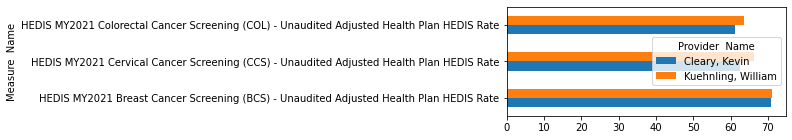

In [7]:
df_cancer.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(5, 2))                                                                                                             
plt.show()

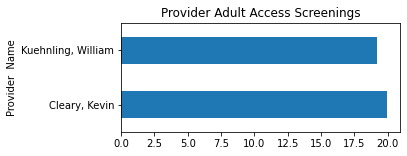

In [8]:
filter_criteria = (Organizational_Quality['Measure  Name'].str.contains('Adults')) 
df_adult = Organizational_Quality[filter_criteria]
df_adult.groupby(['Provider  Name'])['Measure  Completion  Percentage'].mean().plot(kind='barh', figsize=(5, 2), title= 'Provider Adult Access Screenings')
plt.show()

In [9]:
filter_criteria = (Organizational_Quality['Provider  Name'] == 'Cleary, Kevin' ) 
df_individual_provider = Organizational_Quality[filter_criteria]
df_individual_provider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider  Name                   40 non-null     object 
 1   Measure  Name                    40 non-null     object 
 2   Total  Measure  Count            40 non-null     int64  
 3   Total  Not  Met  Count           40 non-null     int64  
 4   Total  Met  Count                40 non-null     int64  
 5   Measure  Completion  Percentage  40 non-null     float64
 6   Organization  Class              40 non-null     object 
 7   Organization  Name               40 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.8+ KB


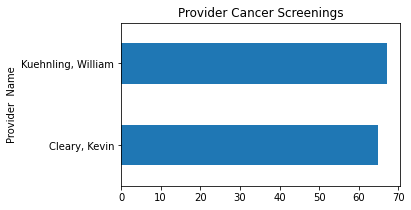

In [10]:
df_cancer.groupby(['Provider  Name'])['Measure  Completion  Percentage'].mean().plot(kind='barh', figsize=(5, 3), title= 'Provider Cancer Screenings')
plt.show()

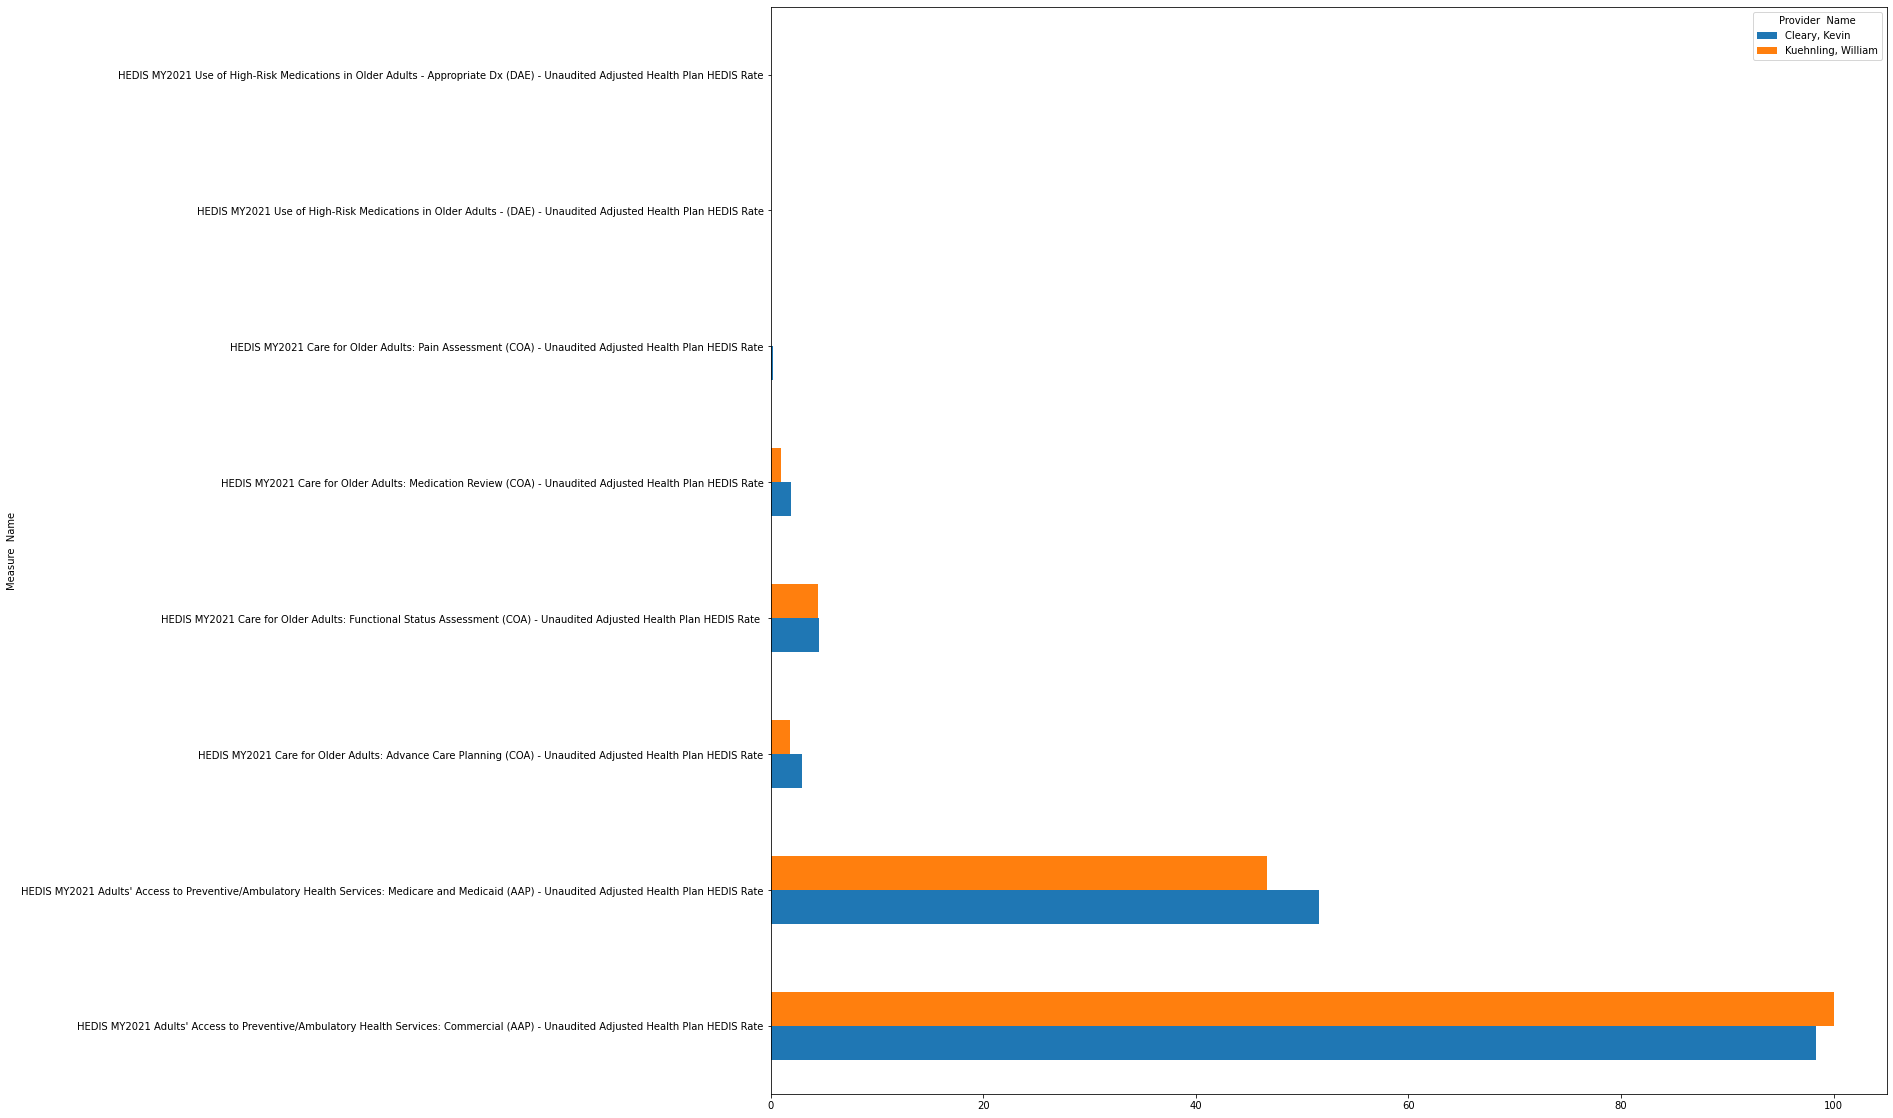

In [11]:
df_adult.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(20, 20))                                                                                                             
plt.show()

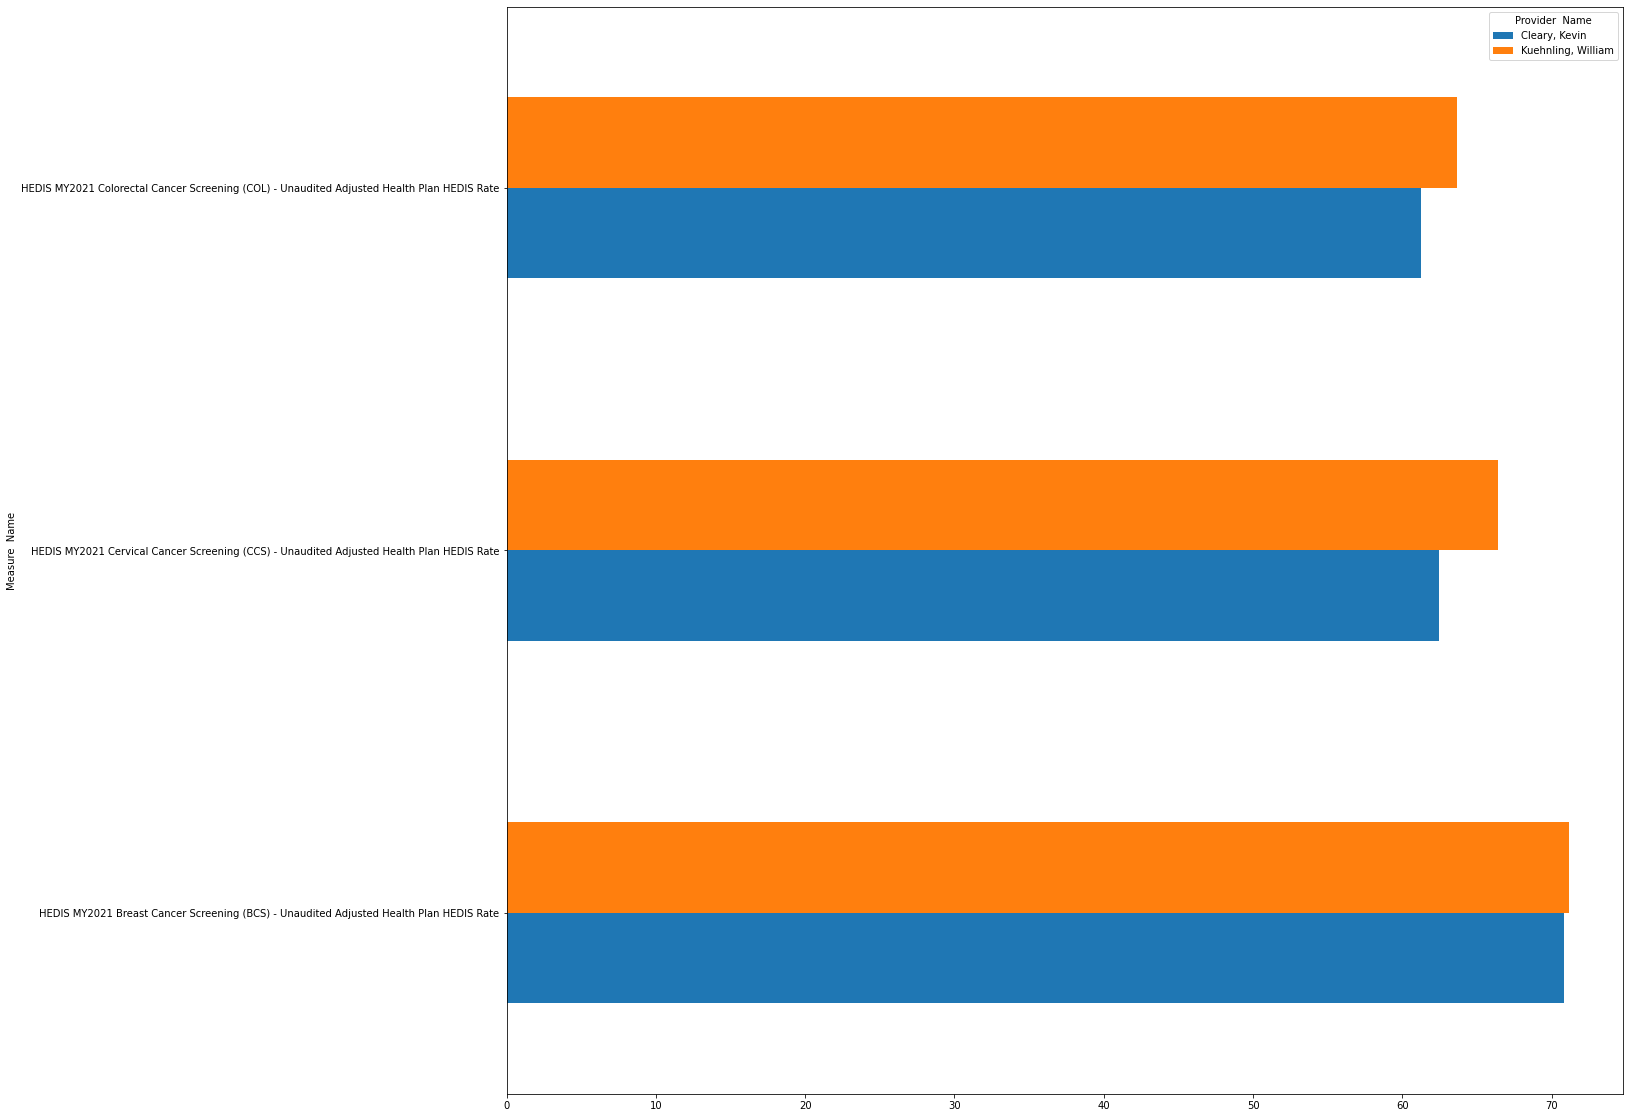

In [12]:
df_cancer.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(20, 20))                                                                                                             
plt.show()

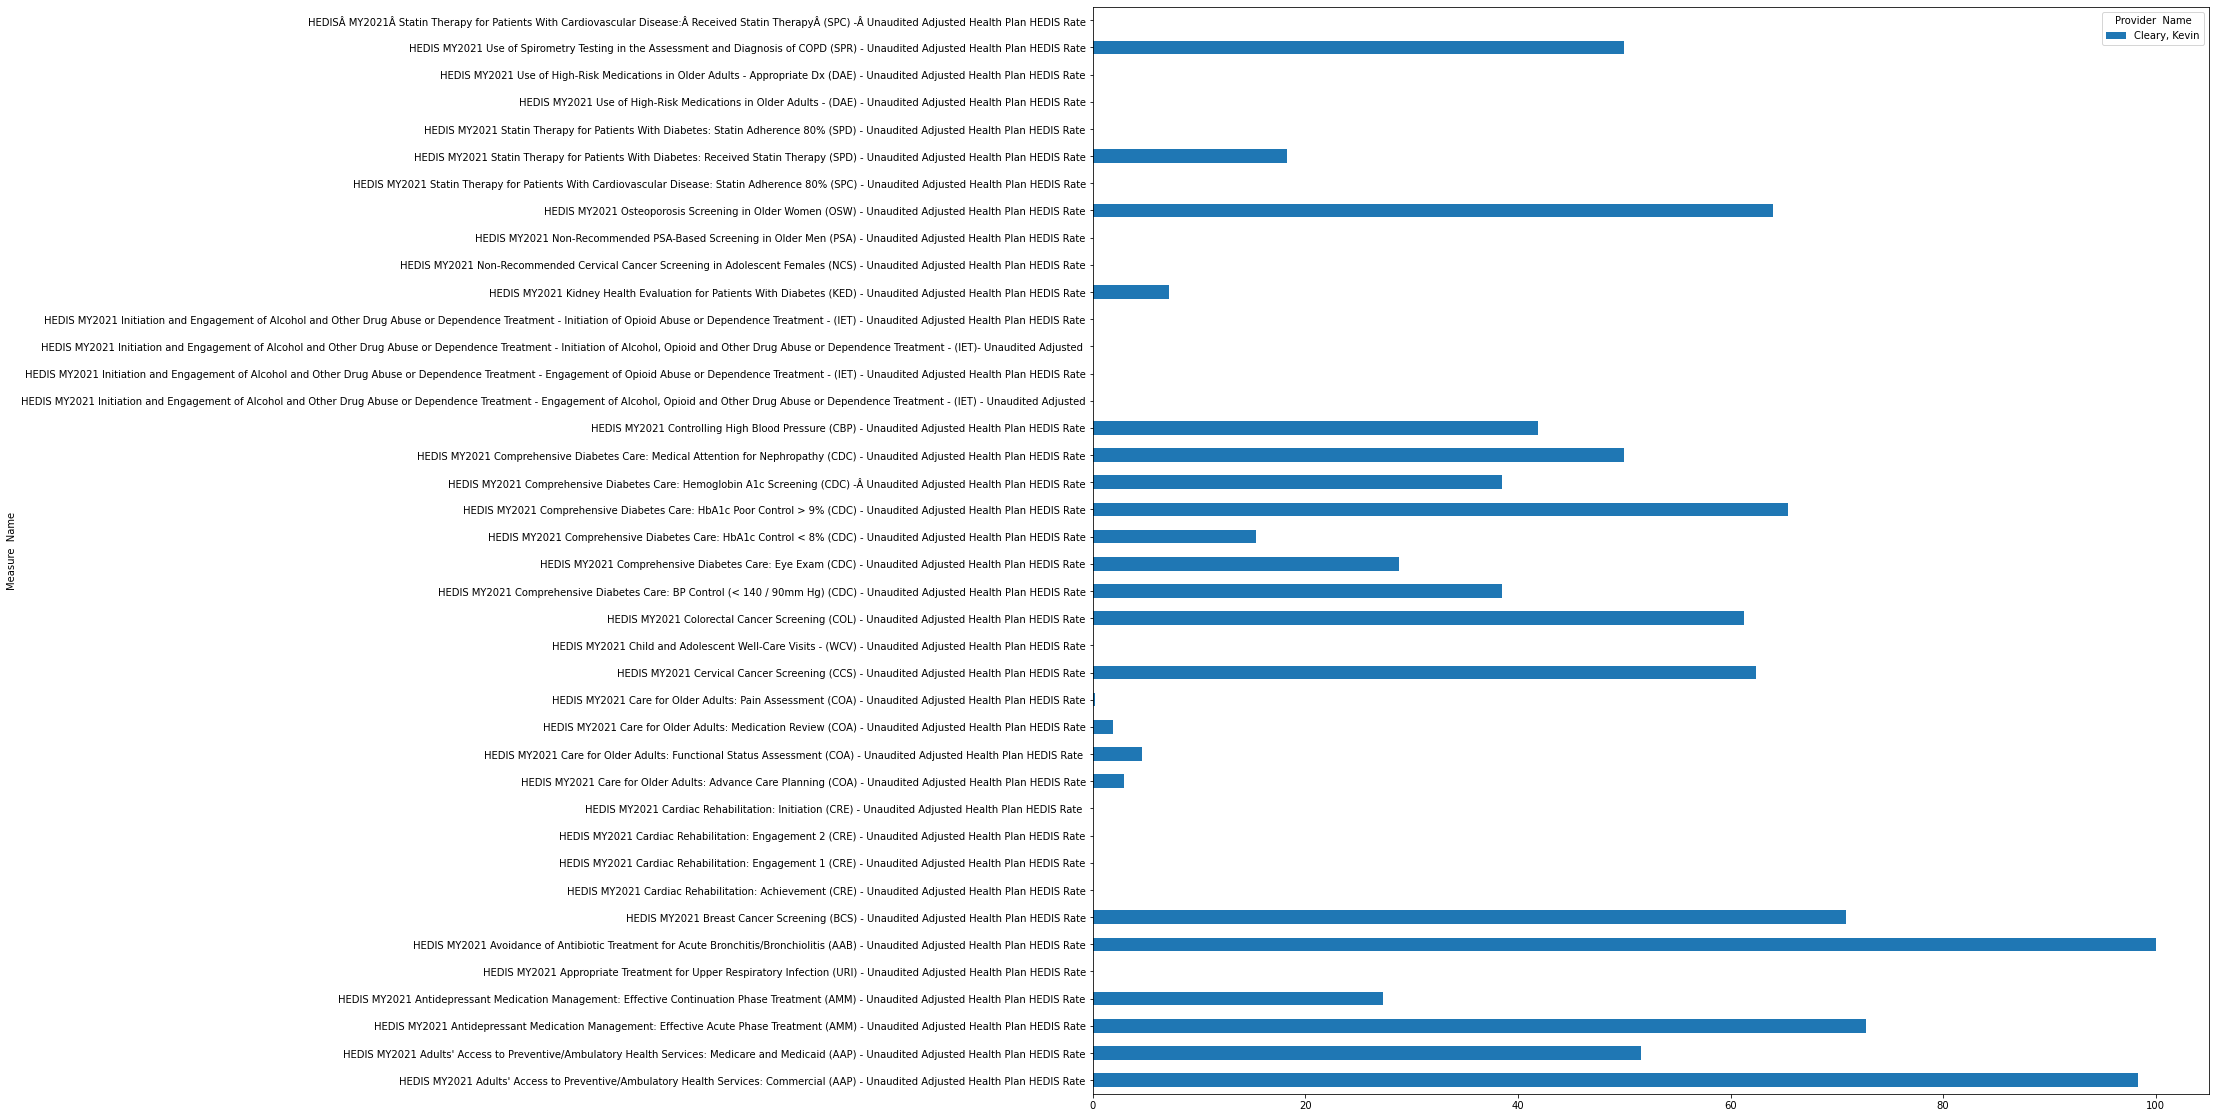

In [13]:
df_individual_provider.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(20, 20))                                                                                                             
plt.show()

In [18]:
# add pivot table using median for each provider on measure
Provider_Quality_Table = Organizational_Quality.pivot_table(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage'
                             ,aggfunc='median' 
                             ,fill_value = 0)                               
                                                            
                                                                                                          
Provider_Quality_Table.loc['Total', :] = Provider_Quality_Table.mean()
Provider_Quality_Table

Provider Name,"Cleary, Kevin","Kuehnling, William"
Measure Name,,
HEDIS MY2021 Adults' Access to Preventive/Ambulatory Health Services: Commercial (AAP) - Unaudited Adjusted Health Plan HEDIS Rate,98.350000,100.000000
HEDIS MY2021 Adults' Access to Preventive/Ambulatory Health Services: Medicare and Medicaid (AAP) - Unaudited Adjusted Health Plan HEDIS Rate,51.580000,46.690000
HEDIS MY2021 Antidepressant Medication Management: Effective Acute Phase Treatment (AMM) - Unaudited Adjusted Health Plan HEDIS Rate,72.730000,81.820000
HEDIS MY2021 Antidepressant Medication Management: Effective Continuation Phase Treatment (AMM) - Unaudited Adjusted Health Plan HEDIS Rate,27.270000,36.360000
HEDIS MY2021 Appropriate Testing for Pharyngitis (CWP) - Unaudited Adjusted Health Plan HEDIS Rate,0.000000,100.000000
HEDIS MY2021 Appropriate Treatment for Upper Respiratory Infection (URI) - Unaudited Adjusted Health Plan HEDIS Rate,0.000000,100.000000
HEDIS MY2021 Avoidance of Antibiotic Treatment for Acute Bronchitis/Bronchiolitis (AAB) - Unaudited Adjusted Health Plan HEDIS Rate,100.000000,100.000000
HEDIS MY2021 Breast Cancer Screening (BCS) - Unaudited Adjusted Health Plan HEDIS Rate,70.820000,71.190000
HEDIS MY2021 Cardiac Rehabilitation: Achievement (CRE) - Unaudited Adjusted Health Plan HEDIS Rate,0.000000,0.000000


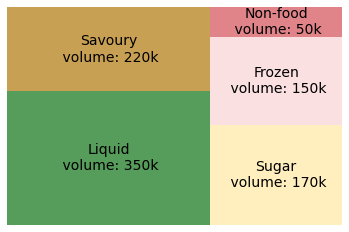

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

volume = [350, 220, 170, 150, 50]
labels = ['Liquid\n volume: 350k', 'Savoury\n volume: 220k',
          'Sugar\n volume: 170k', 'Frozen\n volume: 150k',
          'Non-food\n volume: 50k']
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()


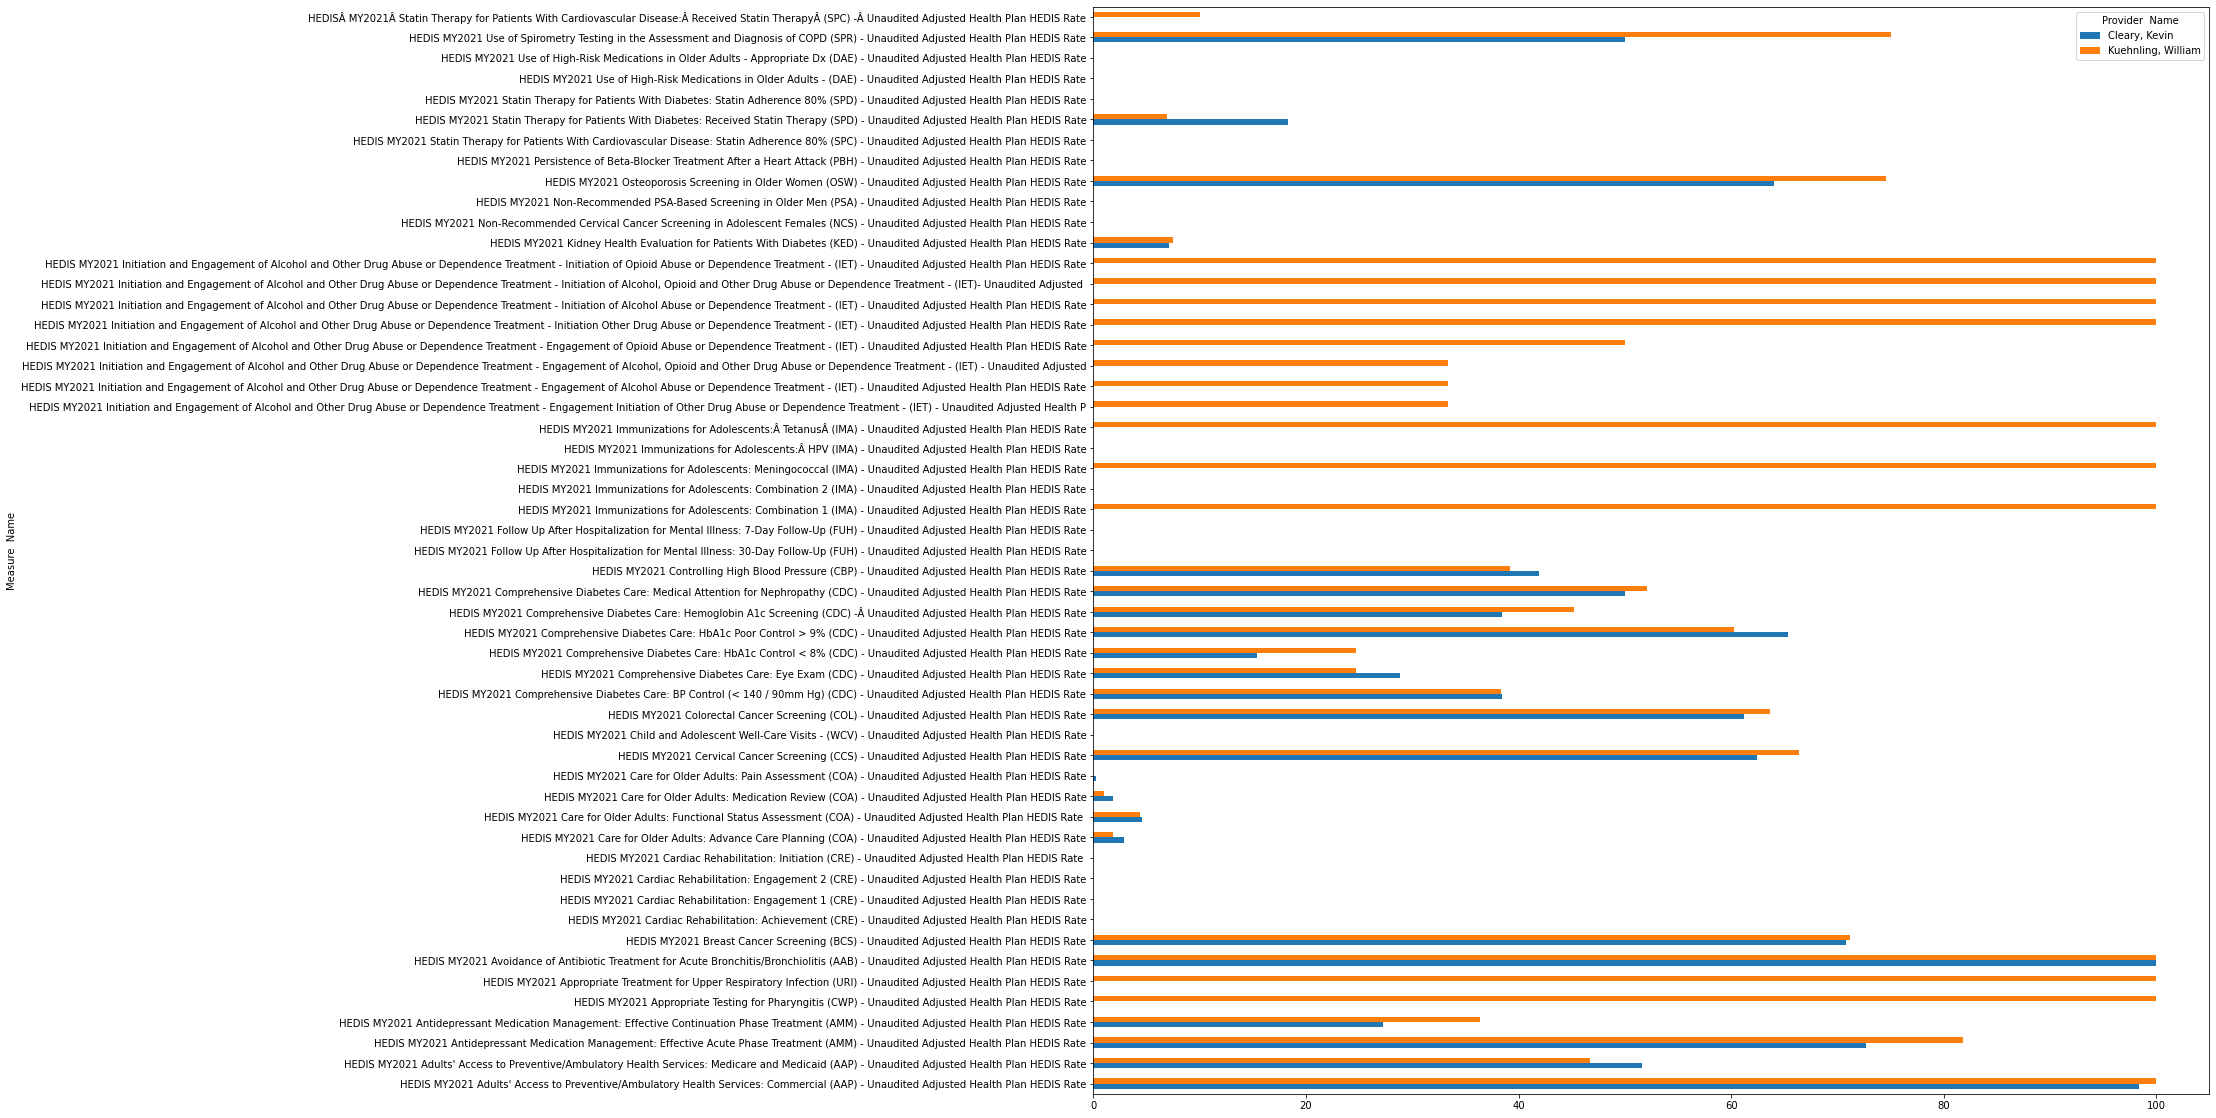

In [51]:
Organizational_Quality.pivot(index='Measure  Name'
                             ,columns='Provider  Name'
                             ,values='Measure  Completion  Percentage').plot(kind='barh'
                                                                             , figsize=(20, 20))                                                                                                             
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

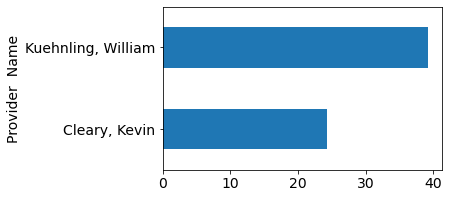

In [67]:
Organizational_Quality.groupby(['Provider  Name'])['Measure  Completion  Percentage'].mean().plot(kind='barh', figsize=(5, 3))
plt.show()

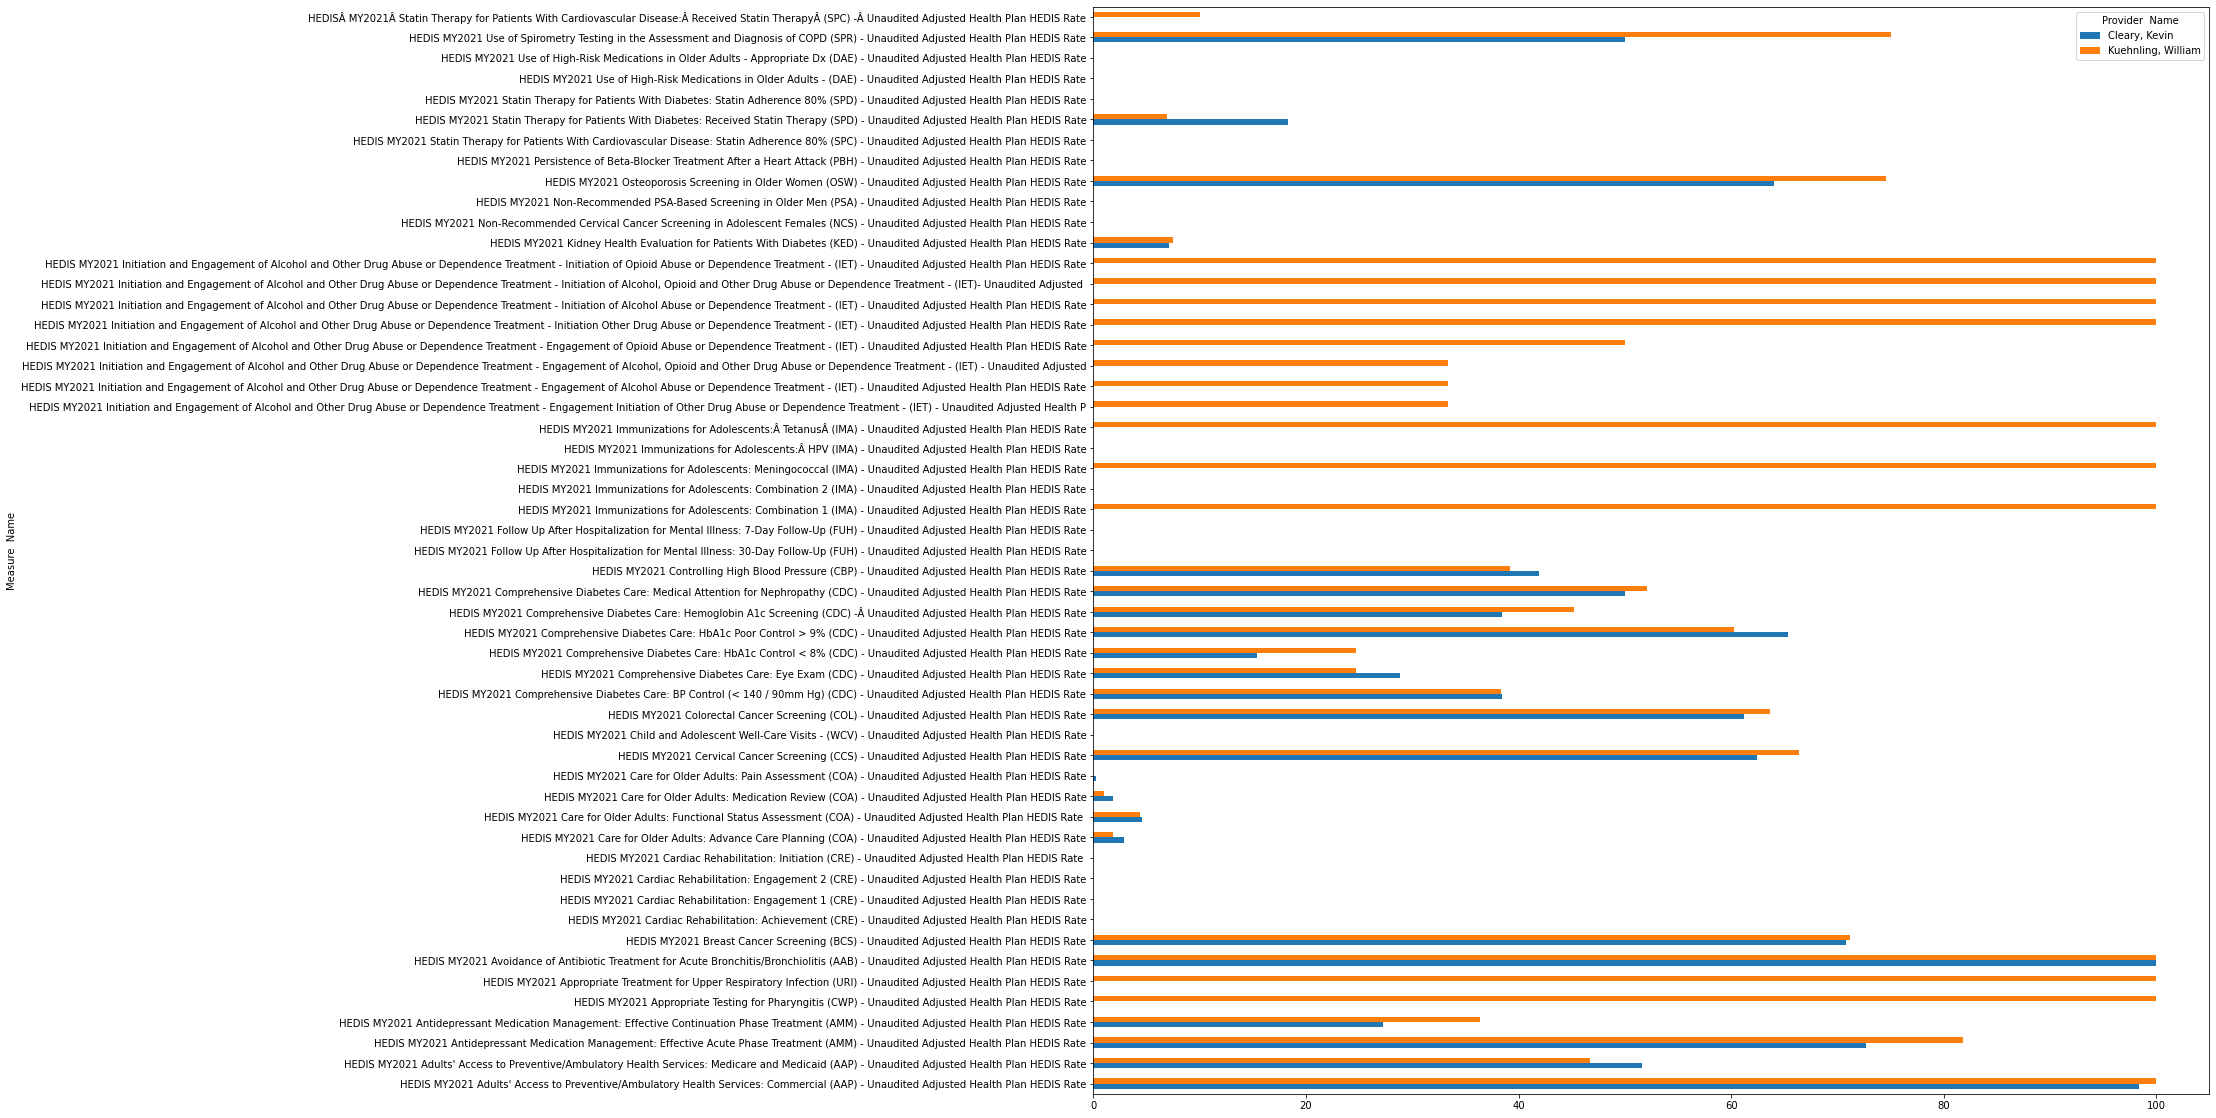

In [36]:
Organizational_Quality.pivot(index='Measure  Name',columns='Provider  Name',values='Measure  Completion  Percentage').plot(kind='barh', figsize=(20, 20))                                                                                                             
plt.show()

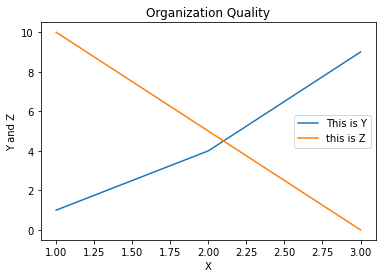

In [16]:
x = [1,2,3] 
y = [1,4,9]
z = [10,5,0]
plt.plot(x,y)
plt.plot(x,z)
plt.xlabel('X')
plt.ylabel('Y and Z')
plt.title('Organization Quality')
plt.legend(["This is Y","this is Z"])
plt.show()

In [ ]:
Organizational_Quality.[""]

In [8]:
Organizational_Quality


,Organization_Class,Organization_Name,Provider_Name,Measure_Qualified_Name,Measure_Name,Is_Registries_Measure,Total_Measure_Count,Total_Not_Met_Count,Total_Not_Met_Has_Email,Total_Not_Met_Has_Phone,Total_Not_Met_Has_Email_And_Phone,Total_Met_Count,Measure_Completion_Percentage
0,Erie County Medical Center,EC PCP Erie County Medical Center FM Clinic,"Abdelsayed, Sarah",hedis.my2021.admin.measures/aap-health-service...,HEDIS MY2021 Adults' Access to Preventive/Ambu...,Analytics Only,7,0,0,0,0,7,100.00
1,Erie County Medical Center,EC PCP Erie County Medical Center FM Clinic,"Abdelsayed, Sarah",hedis.my2021.admin.measures/aap-health-service...,HEDIS MY2021 Adults' Access to Preventive/Ambu...,Analytics Only,88,48,22,48,22,40,45.45
2,Erie County Medical Center,EC PCP Erie County Medical Center FM Clinic,"Abdelsayed, Sarah",hedis.my2021.admin.measures/antidepressant-med...,HEDIS MY2021 Antidepressant Medication Managem...,Analytics Only,4,2,2,2,2,2,50.00
3,Erie County Medical Center,EC PCP Erie County Medical Center FM Clinic,"Abdelsayed, Sarah",hedis.my2021.admin.measures/antidepressant-med...,HEDIS MY2021 Antidepressant Medication Managem...,Analytics Only,4,2,2,2,2,2,50.00
4,Erie County Medical Center,EC PCP Erie County Medical Center FM Clinic,"Abdelsayed, Sarah",hedis.my2021.admin.measures/breast-cancer-scre...,HEDIS MY2021 Breast Cancer Screening (BCS) - U...,Analytics Only,54,42,15,42,15,12,22.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11248,NaN,NaN,"Walczyk, Rachel",hedis.my2021.admin.measures/statin-therapy-for...,HEDIS MY2021 Statin Therapy for Patients With ...,Analytics Only,26,25,4,25,4,1,3.85
11249,NaN,NaN,"Walczyk, Rachel",hedis.my2021.admin.measures/statin-therapy-for...,HEDIS MY2021 Statin Therapy for Patients With ...,Analytics Only,5,5,0,5,0,0,0.00
11250,NaN,NaN,"Walczyk, Rachel",hedis.my2021.admin.measures/use-of-high-risk-m...,HEDIS MY2021 Use of High-Risk Medications in O...,Analytics Only,120,120,17,120,17,0,0.00
11251,NaN,NaN,"Walczyk, Rachel",hedis.my2021.admin.measures/use-of-high-risk-m...,HEDIS MY2021 Use of High-Risk Medications in O...,Analytics Only,120,120,17,120,17,0,0.00


In [9]:
# Filter to Measures that are analytics only , calculate Percent complete and round 
Organizational_Quality = Organizational_Quality[(Organizational_Quality.Is_Registries_Measure == 'Analytics Only')]   
# Filter to Measures that are analytics only 
Organizational_Quality['Is_Registries_Measure'].value_counts()


Analytics Only    11253
Name: Is_Registries_Measure, dtype: int64

In [10]:
# simplify and Organize the organization quality Panels 
Organizational_Quality = Organizational_Quality[['Provider_Name','Measure_Name', 'Total_Measure_Count',
       'Total_Not_Met_Count', 'Total_Met_Count', 'Measure_Completion_Percentage',   'Organization_Class', 'Organization_Name']]
#       'Total_Not_Met_Has_Email','Total_Not_Met_Has_Email', 'Total_Not_Met_Has_Phone', 'Total_Not_Met_Has_Email_And_Phone','Measure_Qualified_Name','Is_Registries_Measure'

#Organizational_Quality = Organizational_Quality[['Measure_Name', 'Total_Measure_Count',
#       'Total_Not_Met_Count', 'Total_Met_count', 'Measure_Completion_Percentage',
#       'Total_Not_Met_Has_Email','Total_Not_Met_Has_Email',
#       'Total_Not_Met_Has_Phone', 'Total_Not_Met_Has_Email_And_Phone',
#       'Organization_Class', 'Organization_Name','Measure_Qualified_Name','Is_Registries_Measure']]



In [11]:
# Optional Verify the input file structures 
#Organizational_Quality.info()
#Organization_Provider_Summary.head()
Organizational_Quality.columns 

Index(['Provider_Name', 'Measure_Name', 'Total_Measure_Count',
       'Total_Not_Met_Count', 'Total_Met_Count',
       'Measure_Completion_Percentage', 'Organization_Class',
       'Organization_Name'],
      dtype='object')

In [12]:
Color_Scale_Rule = ColorScaleRule(start_type="min",start_color="FF0000",end_type="max",end_color="99FF33")
Data_Bar_Rule = DataBarRule(start_type="min", end_type="max", color="00CC00")

In [13]:
# The following function creates patient panels based upon organization name 
def create_organization_panel(org_name):
    Organization_panel = Organizational_Quality[(Organizational_Quality.Organization_Name == org_name)]    
    patient_rows = len(Organization_panel) - 1 
    report_name = '_org_prv_quality'
    if patient_rows > 2:
        spread_name = Organization_panel['Organization_Name'].iloc[0]
        if spread_name == '':
            spread_name = 'No_ORG_NAME_'  
        spread_name = spread_name.replace('/','')  
       
        spath =  Path_to_Excel

        csv_name = spath + spread_name.replace(' ','_') + report_name + '.csv'        
        spread_name = spath + spread_name.replace(' ','_') + report_name + '.xlsx'
        spread_name = spread_name.replace(' ','')
        csv_name = csv_name.replace(' ','')        
        Organization_panel.to_excel(spread_name,sheet_name='Provider Quality', index = False)  
        Organization_panel.to_csv(csv_name, index = False)  
        print(spread_name)
        return org_name

In [14]:
Org_names = Organizational_Quality.Organization_Name.unique()
for org in Org_names:
    create_organization_panel(org)

c:/Users/josep/Documents/Kaleida/HEDIS_Prv/EC_PCP_Erie_County_Medical_Center_FM_Clinic_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/EC_PCP_Erie_County_Medical_Center_Grider_Fam_Health_Clinic_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/EC_PCP_Erie_County_Medical_Center_IM_Clinic_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/EC_PCP_Erie_County_Medical_Center_VIP_Clinic_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/EC_PCP_Erie_County_Medical_Center_You_Center_for_Wellness_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/ECMC_Family_Health_Center_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Erie_County_Medical_Center_Corporation_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Great_Lakes_Physician_PC_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/GPPC_PCP_Amherst_Sheridan_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/GPPC_PCP_Buffal

c:/Users/josep/Documents/Kaleida/HEDIS_Prv/WN_PCP_Western_NY_Med_4247_Maple_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/WN_PCP_Western_NY_Med_6970_Erie_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/YP_PCP_Yasmin_Pervez,_MD_Wheatfield_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Independent_Providers_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Limestone_Primary_Care_Physicians_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Niagara_Family_Medicine_Associates_PC_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Thomas_E_Dougherty_MD_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Westfield_Family_Physicians,_PC_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/KH_PCP_Hertel_Elmwood_Internal_Medicine_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/KH_PED_Broadway_Pediatrics_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Pr

In [22]:
# Add the Provider Summary Excel Tab  
path = 'c:/Users/josep/Documents/Kaleida/HEDIS_Prv/'
extension = 'xlsx'
os.chdir(path)
files = glob.glob('*.{}'.format(extension))

for x in range(len(files)): 
#    print(files[x]) 
    file_path = Path_to_Excel + files[x]
    org_name =  files[x].replace('org prv quality','')      
    org_name =  org_name.replace('_org_prv_quality','')   
     
    org_name =  org_name.replace('.xlsx','')
    org_name =  org_name.replace('_',' ')    
    print (org_name)
    print (file_path)
    Organization_panel = Organization_Provider_Summary[(Organization_Provider_Summary.Organization_Name == org_name)]  
    Organization_panel = Organization_panel.reset_index(drop=True)
  
    writer = pd.ExcelWriter(file_path, engine='openpyxl', mode='a')
    writer.book = load_workbook(file_path)
    Organization_panel.to_excel(writer,sheet_name='Provider Summary', index = False)
    writer.save()
    writer.close()

AA PCP Alan M Antfleck Physician PLLC Delaware Ave
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/AA_PCP_Alan_M_Antfleck_Physician_PLLC_Delaware_Ave_org_prv_quality.xlsx
AFC PCP Akron Family Care 16 Main St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/AFC_PCP_Akron_Family_Care_16_Main_St_org_prv_quality.xlsx
AF PCP Acacia Family Health 15 Elizabeth Dr
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/AF_PCP_Acacia_Family_Health_15_Elizabeth_Dr_org_prv_quality.xlsx
AP PCP Amandeep Pal MD PLLC Robinson Road
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/AP_PCP_Amandeep_Pal_MD_PLLC_Robinson_Road_org_prv_quality.xlsx
BF PCP Bradford Family Medicine 14 N Third St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/BF_PCP_Bradford_Family_Medicine_14_N_Third_St_org_prv_quality.xlsx
BRM PCP Bradford Regional Medical Services, 2 N Center St Bradford PA
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/BRM_PCP_Bradford_Regional_Medical_Services,_2_N_Center_St_Bradford_PA_org_prv_quality.xlsx
CC PCP Chaudhuri and Chaudhuri Physi

KH PED Niagara Street Pediatrics
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/KH_PED_Niagara_Street_Pediatrics_org_prv_quality.xlsx
KZ PCP Kenneth S Zimmerman 6760 Main St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/KZ_PCP_Kenneth_S_Zimmerman_6760_Main_St_org_prv_quality.xlsx
Limestone Primary Care Physicians
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Limestone_Primary_Care_Physicians_org_prv_quality.xlsx
LI PCP Louis W Irmisch MD W Spring St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/LI_PCP_Louis_W_Irmisch_MD_W_Spring_St_org_prv_quality.xlsx
LR PCP Canalside Primary Care PC 43 Niagara St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/LR_PCP_Canalside_Primary_Care_PC_43_Niagara_St_org_prv_quality.xlsx
Maple Internal Medicine & Pediatrics PLLC
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/Maple_Internal_Medicine_&_Pediatrics_PLLC_org_prv_quality.xlsx
MH PED Medical Health Assoc 13404 Broadway
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/MH_PED_Medical_Health_Assoc_13404_Broadway_org_prv_quality.xls

WN PCP Western NY Med  4979 Harlem
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/WN_PCP_Western_NY_Med__4979_Harlem_org_prv_quality.xlsx
YP PCP Yasmin Pervez, MD Wheatfield St
c:/Users/josep/Documents/Kaleida/HEDIS_Prv/YP_PCP_Yasmin_Pervez,_MD_Wheatfield_St_org_prv_quality.xlsx


In [16]:
# The following function creates patient panels based upon organization name 
def create_sheet_one(work_book):
   
    ws1 = work_book.active
    ws1.title = "NCQA HEDIS Quality Measures"
    ws1.sheet_properties.tabColor = CONTENT_TAB_COLOR
    
# Format the Header as bold blue centered wordwrap     
    max_cols = ws1.max_column + 1 
    for col in range(1,max_cols):
        ws1[get_column_letter(col) + '1'].font = Font(bold=True ) 
        ws1[get_column_letter(col) + '1'].fill = PatternFill("solid", start_color=HEADER_COLOR) 
        ws1[get_column_letter(col) + '1'].alignment = Alignment(horizontal='center', wrap_text=True)  
    
    
# Work Sheet 1 - Set Column Widths and Header Hieght
    ws1.column_dimensions['A'].width = 25
    ws1.column_dimensions['B'].width = 120
    ws1.column_dimensions['C'].width = 10
    ws1.column_dimensions['D'].width = 10
    ws1.column_dimensions['E'].width = 10
    ws1.column_dimensions['F'].width = 15
    ws1.column_dimensions['G'].width = 30
    ws1.column_dimensions['H'].width = 30

    ws1.row_dimensions[1].height = 75   

# Replaces all underscores in header with two spaces 
    for col in range(1,max_cols):
        ws1[get_column_letter(col) + '1'].value = ws1[get_column_letter(col) + '1'].value.replace('_','  ')
    
# Set Filtering on 
    FullRange = "A1:" + get_column_letter(ws1.max_column) \
    + str(ws1.max_row)
    ws1.auto_filter.ref = FullRange    

  
    ws1.freeze_panes = 'A2'
    ws1.conditional_formatting.add("F1:F" + str(ws1.max_row), Color_Scale_Rule )
        
    return work_book  

In [17]:
# The following function formats provider summary 
def create_sheet_two(work_book):
    from openpyxl.utils import get_column_letter
    from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment    
    import openpyxl
    
    sheets = work_book.sheetnames
   
    ws2 = work_book[sheets[1]]
   # ws = wb[sheets[n]]
    ws2.title = "Provider Summary"
    ws2.sheet_properties.tabColor = CONTENT_TAB_COLOR
     
# Format the Header as bold blue centered wordwrap 
    ws2.row_dimensions[1].height = 60 
    max_cols = ws2.max_column + 1 
    for col in range(1,max_cols):
        ws2[get_column_letter(col) + '1'].font = Font(bold=True ) 
        ws2[get_column_letter(col) + '1'].fill = PatternFill("solid", start_color=HEADER_COLOR) 
        ws2[get_column_letter(col) + '1'].alignment = Alignment(horizontal='center', wrap_text=True) 
# Replaces all underscores in header with two spaces         
        ws2[get_column_letter(col) + '1'].value = ws2[get_column_letter(col) + '1'].value.replace('_','  ')        
    
# Work Sheet 1 - Patient Attribution - Set Column Widths and Header Hieght
    ws2.column_dimensions['A'].width = 30
    ws2.column_dimensions['B'].width = 30
    ws2.column_dimensions['C'].width = 30
    ws2.column_dimensions['D'].width = 30
    ws2.column_dimensions['E'].width = 30
    ws2.column_dimensions['F'].width = 30

# Set Filtering on 
    FullRange = "A1:" + get_column_letter(ws2.max_column) \
    + str(ws2.max_row)
    ws2.auto_filter.ref = FullRange    

    return work_book  

In [26]:
def create_sheet_feedback(work_book):
    
    # Create The Tab 
    ws_feedback = work_book.create_sheet("Feedback")
    ws_feedback.title = "Feedback or Issues" 
    ws_feedback.sheet_properties.tabColor = USER_TAB_COLOR
    
    # Blank the Canvas 
    fontStyle = Font(size = "12", bold = True)
    for col in range(1,25):
        for row in range(1,25):
            ws_feedback[get_column_letter(col) + str(row)].alignment = Alignment(horizontal='left', vertical='top', wrap_text=True)          
            ws_feedback[get_column_letter(col) + str(row)].font = fontStyle
            ws_feedback[get_column_letter(col) + str(row)].fill = PatternFill("solid", fgColor=BLANK_WHITE)
    
    
    # Create The Title 
    ws_feedback.merge_cells('A1:B1')
    ws_feedback.row_dimensions[1].height = 20
    top_left_cell = ws_feedback['A1']
    top_left_cell.value = "Feedback or Issues"

    top_left_cell.fill = PatternFill("solid", fgColor=USER_TAB_COLOR)
    top_left_cell.fill = fill = GradientFill(stop=(USER_TAB_COLOR, BLANK_WHITE))
    top_left_cell.font  = Font(b=True, color="000000")
    top_left_cell.alignment = Alignment(horizontal="center", vertical="center")
    fontStyle = Font(size = "18", bold = "True")
    top_left_cell.font = fontStyle

    ws_feedback['A2'] = 'User Name'
    ws_feedback['B2'] = 'Issue or Feedback'
  
    for col in range(1,3):
        ws_feedback[get_column_letter(col) + '2'].font = Font(size = "12", bold=True ) 
        ws_feedback[get_column_letter(col) + '2'].alignment = Alignment(horizontal='center', vertical='bottom', wrap_text=True)
        ws_feedback[get_column_letter(col) + '2'].fill = PatternFill("solid", fgColor=HEADER_COLOR)
    
    ws_feedback.column_dimensions['A'].width = 30
    ws_feedback.column_dimensions['B'].width = 120 

    ws_feedback.row_dimensions[2].height = 30
 
   
    return work_book  
 



In [18]:
def create_instruction_sheet(work_book):
    
    ws_instruction  = work_book.create_sheet("Instructions")
    ws_instruction.title = "Instructions" 
    ws_instruction.sheet_properties.tabColor = USER_TAB_COLOR
    
    # Blank the Canvas 
    fontStyle = Font(size = "12", bold = True)
    for col in range(1,25):
        for row in range(1,25):
            ws_instruction[get_column_letter(col) + str(row)].alignment = Alignment(horizontal='left', vertical='top', wrap_text=True)          
            ws_instruction[get_column_letter(col) + str(row)].font = fontStyle
            ws_instruction[get_column_letter(col) + str(row)].fill = PatternFill("solid", fgColor=BLANK_WHITE)
            
    for row in range(1,25):
            ws_instruction.row_dimensions[row].height = 20         
            
    ws_instruction.column_dimensions['A'].width = 3
    ws_instruction.column_dimensions['B'].width = 3
    ws_instruction.column_dimensions['C'].width = 80            
    
    
    ws_instruction.merge_cells('A1:F1')
    top_left_cell = ws_instruction['A1']
    top_left_cell.value = "Instructions for Validation"

    top_left_cell.fill = PatternFill("solid", fgColor=USER_TAB_COLOR)
    top_left_cell.fill = fill = GradientFill(stop=(USER_TAB_COLOR, BLANK_WHITE))
    top_left_cell.font  = Font(b=True, color="000000")
    top_left_cell.alignment = Alignment(horizontal="center", vertical="center")
    fontStyle = Font(size = "18", bold = "True")
    top_left_cell.font = fontStyle

    fontStyle = Font(size = "14", bold = "True")
    ws_instruction.merge_cells('A3:F3')
    ws_instruction['A3'].font = fontStyle
    ws_instruction['A3'] = 'Spreadsheet instructions:'


    ws_instruction['B4'] = 1
    ws_instruction['B5'] = 2 
    
    ws_instruction['C4'] = 'Use Filter column A  \'Provider Name \' to select the provider you want'
    ws_instruction['C5'] = 'If any issues or problems are identified, please enter them on the \'Feedback\' tab. '       
    
    return work_book  

In [19]:
# Automate the worksheet 
def create_work_book(work_book):
    create_sheet_one(wb)
    create_sheet_two(wb)
    create_instruction_sheet(wb) 
    create_sheet_feedback(wb)    
    return work_book      

In [27]:
Path_to_Excel = 'c:/Users/josep/Documents/Kaleida/HEDIS_Prv/'
Path_to_Save_Excel = 'c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/'
extension = 'xlsx'
os.chdir(Path_to_Excel)
files = glob.glob('*.{}'.format(extension))

for x in range(len(files)): 
#    print(files[x]) 
#    print(Path_to_Excel + files[x])     
    wb = load_workbook(Path_to_Excel + files[x])
    org_name =  files[x].replace('.xlsx','')
    create_work_book(wb)
    wb.save(Path_to_Save_Excel + files[x])
    print(Path_to_Save_Excel + files[x])   


c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/AA_PCP_Alan_M_Antfleck_Physician_PLLC_Delaware_Ave_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/AFC_PCP_Akron_Family_Care_16_Main_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/AF_PCP_Acacia_Family_Health_15_Elizabeth_Dr_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/AP_PCP_Amandeep_Pal_MD_PLLC_Robinson_Road_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/BF_PCP_Bradford_Family_Medicine_14_N_Third_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/BRM_PCP_Bradford_Regional_Medical_Services,_2_N_Center_St_Bradford_PA_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/CC_PCP_Chaudhuri_and_Chaudhuri_Physicians,_PLLC_4525_Witmer_Rd_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/CF_PCP_Clarke_Family_Medicine_LLP_6950_Williams_Rd_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/Christopher_E_

c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/NM_PCP_Nora_E_Meaney-Elman_8171_Sheridan_Drive_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/NW_PCP_Buffalo_Community_Health_Care_Center_Niagara_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/NW_PCP_NW_Buffalo_Community_300_Niagara_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/OB_PCP_Olivia_Smith-Blackwell_601_Division_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/Olean_Medical_Group,_LLP_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/OMG_PCP_Olean_Medical_Group_449_Broad_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/OMG_PCP_Olean_Medical_Group_45_W_Main_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/OMG_PCP_Olean_Medical_Group_535_Main_St_org_prv_quality.xlsx
c:/Users/josep/Documents/Kaleida/HEDIS_Prv_ft/OMG_PCP_Olean_Medical_Group_Franklinville_12_Main_St_org_prv_quality.xlsx
c:/Use